In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is available


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

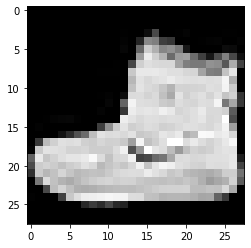

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

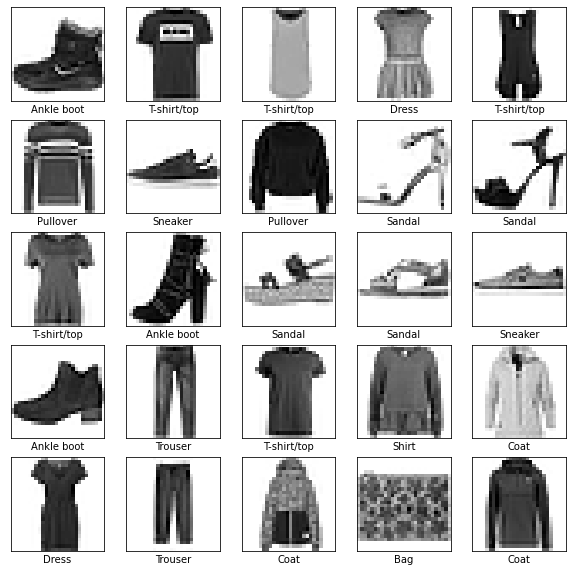

In [6]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [7]:
model = keras.Sequential([
    # From [28, 28] to [784]. We are unstacking the pixels, no learning is performed.
    keras.layers.Flatten(input_shape=(28, 28)),
    # Dense layer with 128 nodes.
    keras.layers.Dense(128, activation='relu'),
    # Dense layer outputing 10 nodes, because we have 10 classes of label.
    keras.layers.Dense(10)
])

model.compile(
    # How the model is updated based on loss function. It's always adam.
    optimizer='adam',
    # Method used to determine how acucrate the model is in training.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # The metric used to monitor the fraction of image correctly classified.
    metrics=['accuracy']
)

In [8]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4998 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3731 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2472 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3448 - accuracy: 0.8787

Test accuracy: 0.8787000179290771


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [110]:
predictions[0]

array([1.7386326e-05, 8.8113559e-08, 4.1701060e-07, 1.5793620e-07,
       4.7964015e-08, 3.3688059e-04, 2.7739080e-07, 5.0270325e-03,
       1.6292788e-07, 9.9461764e-01], dtype=float32)

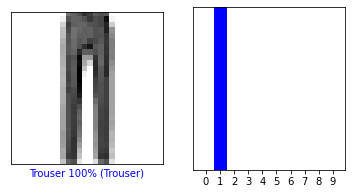

In [77]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 24
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

2


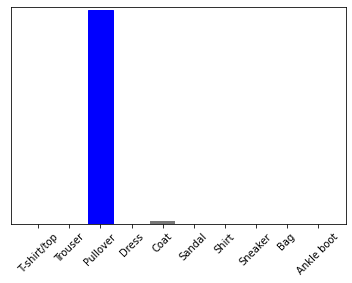

In [21]:
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

print(np.argmax(predictions_single[0]))
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

[0.0000000e+00 0.0000000e+00 9.9999976e-01 2.1423631e-07 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


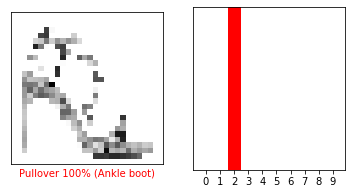

In [123]:
import cv2

def load_my_data():
    img = cv2.imread('1239139_clean.jpg', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = cv2.resize(img, (28, 28))
    img = np.array(img, dtype=np.float32)
    img = img.reshape((1,) + img.shape)
    # print(img.shape)
    # print(test_images.shape)
    
    test_target = img
    i = 0
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_target)
    print(predictions[i])

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_target)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)

load_my_data()